In [27]:
pip install klib

In [17]:
pip install dtale

     |████████████████████████████████| 10.9 MB 5.7 MB/s 
     |████████████████████████████████| 62 kB 867 kB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
     |████████████████████████████████| 642 kB 46.2 MB/s 
     |████████████████████████████████| 1.8 MB 47.4 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 79.9 MB 57 kB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 197 kB 45.5 MB/s 
     |████████████████████████████████| 23.9 MB 1.6 MB/s 
     |████████████████████████████████| 3.7 MB 28.1 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
     |████████████████████████████████| 1.8 MB 38.6 MB/s 
     |████████████████████████████████| 357 kB 48.6 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100488 sha256=7e11f4aedb2a4be9ec52cc7f87b86e285c06c98b8ca5dd199881253e9c85baa1
  Stored in directory: /root/.cache/pip/wheels/5

In [19]:
pip install pandas-profiling[notebook,html]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print("user uploaded file {name} with length {length} bytes".format(name=fn, length=len(uploaded[fn])))

Saving Test.csv to Test (1).csv
Saving Train.csv to Train (1).csv
user uploaded file Test.csv with length 527709 bytes
user uploaded file Train.csv with length 869537 bytes


In [4]:
df_train = pd.read_csv(r"Train.csv")
df_test = pd.read_csv(r"Test.csv")

In [5]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [45]:
df_train.shape

(8523, 12)

In [46]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [47]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [30]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [49]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [50]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [7]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [52]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [54]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [20]:
# EDA with Dtale Library

import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

In [21]:
dtale.show(df_train)

2021-09-02 10:48:06,781 - INFO     - NumExpr defaulting to 2 threads.


https://efnakvbq8fl-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [22]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.1 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
     |████████████████████████████████| 675 kB 47.7 MB/s 
     |████████████████████████████████| 3.1 MB 33.5 MB/s 
     |████████████████████████████████| 812 kB 55.2 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=43ca70ecfd078410ed25e09a304186b4abae97a020bc80a3a290cd85f3d94bcb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=1673dc33c0b52599c516800763c767f5c6bc45c3a8d52aaf532e179447254523
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [23]:
from pandas_profiling import ProfileReport

In [24]:
profile = ProfileReport(df_train, title="pandas profiling report")

In [25]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
import klib

In [2]:
klib.describe

<module 'klib.describe' from '/usr/local/lib/python3.7/dist-packages/klib/describe.py'>

GridSpec(6, 7)

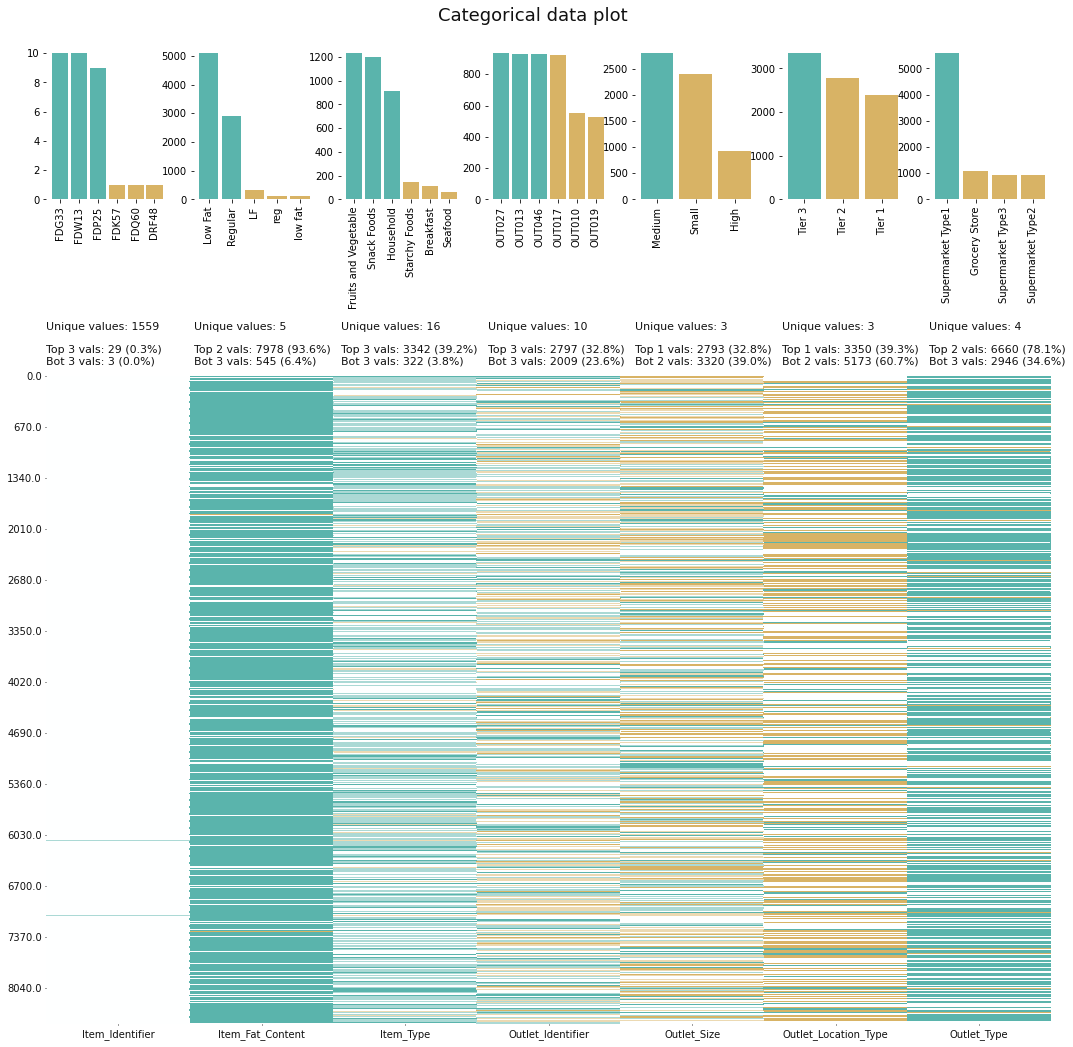

In [8]:
klib.cat_plot(df_train)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

In [57]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [11]:
import joblib
joblib.dump(le,r'Le.sav')

['Le.sav']

In [12]:
x = df_train.drop('Item_Outlet_Sales',axis=1)

In [13]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1999,1,0,1
1,5.920,2,0.019278,14,48.2692,2009,1,2,2
2,17.500,1,0.016760,10,141.6180,1999,1,0,1
3,19.200,2,0.000000,6,182.0950,1998,1,2,0
4,8.930,1,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2


In [14]:
y = df_train['Item_Outlet_Sales']

In [15]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=1000, test_size=0.2, shuffle=True)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
x_train_std = sc.fit_transform(x_train)

In [19]:
x_train_std

array([[ 1.28229630e+00,  9.66485965e-01,  2.26502989e+00, ...,
        -2.93258180e-01, -1.36229435e+00, -2.47814240e-01],
       [ 1.08618929e-03, -5.79256777e-01,  2.85985022e-01, ...,
        -2.93258180e-01,  1.09780971e+00,  2.25529315e+00],
       [ 1.08618929e-03,  9.66485965e-01, -2.84061407e-01, ...,
        -2.93258180e-01,  1.09780971e+00,  2.25529315e+00],
       ...,
       [-7.72922215e-01,  9.66485965e-01, -1.27442519e+00, ...,
        -2.93258180e-01, -1.32242320e-01, -2.47814240e-01],
       [-1.27187700e+00,  2.51222871e+00,  5.84441123e-01, ...,
         1.38976730e+00, -1.36229435e+00, -2.47814240e-01],
       [ 9.49659777e-01,  9.66485965e-01,  1.80704361e+00, ...,
         1.38976730e+00, -1.32242320e-01, -2.47814240e-01]])

In [20]:
x_test_std = sc.transform(x_test)

In [21]:
import joblib
joblib.dump(sc,r'Sc.sav')

['Sc.sav']

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

In [25]:
rf.fit(x_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

RandomForestRegressor(n_estimators=1000)

In [27]:
y_pred = rf.predict(x_test_std)

In [28]:
print(r2_score(y_test,y_pred))

0.559303402764207


In [29]:
print(mean_absolute_error(y_test,y_pred))

810.3898217923753


In [30]:
print(np.sqrt(mean_absolute_error(y_test,y_pred)))

28.46734658854554


In [75]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [76]:
#define models and parameters

model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

grid_search_forest.best_params_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.544 using {'n_estimators': 1000}
0.511 (0.000) with: {'n_estimators': 10}
0.538 (0.002) with: {'n_estimators': 100}
0.544 (0.003) with: {'n_estimators': 1000}


{'n_estimators': 1000}

In [31]:
import joblib
joblib.dump(rf,"randomforest.sav")


['randomforest.sav']